2. (cont.) For each model, plot a) regularization parameter value vs. error on test data and error on training data

In [23]:
import pandas as pd
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv('cal_housing.data', header = None)
data.columns = ['Longitude','Latitude', 'Households', 'Population', 'Total Bedrooms', 'Total Rooms','Housing Median Age','Median Income','Median House Value']

In [24]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Isolate the data
X = data["Total Bedrooms"].values.reshape(-1,1)
Y = data["Median House Value"].values.reshape(-1,1)

# Define the parameter we wish to optimize
parameters = {'alpha':np.linspace(0, 1000, 50)}

## Lasso model

In [25]:
from sklearn.linear_model import Lasso
Lasso = linear_model.Lasso() # Define the model we wish to test

# Define a grid search that will use 5-fold cross validation
Lasso_reg = GridSearchCV(Lasso, parameters, scoring = 'neg_root_mean_squared_error', cv = 5, return_train_score = True)
Lasso_reg.fit(X,Y) # Fit the grid search
print(Lasso_reg.best_estimator_) # Print best alpha parameter

Lasso(alpha=1000.0)


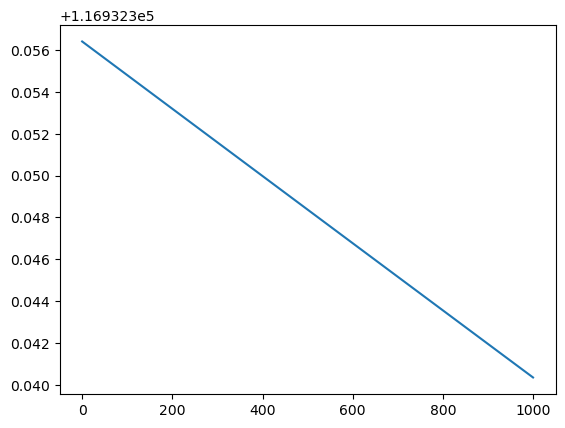

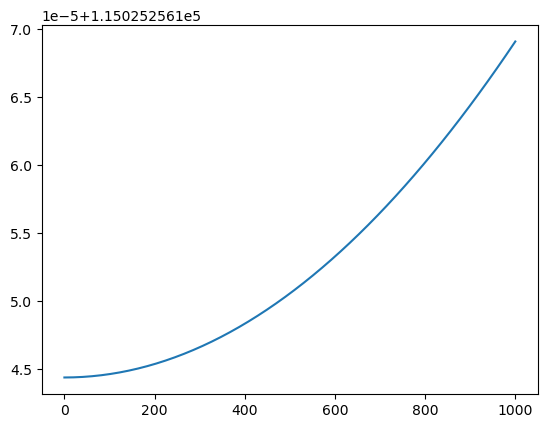

In [26]:
#plot
Lasso_meanTest = abs(Lasso_reg.cv_results_['mean_test_score'])
# plotting data 1
plt.figure()
plt.plot(parameters['alpha'], Lasso_meanTest, label = "LASSO")
plt.show()

Lasso_meanTrain = abs(Lasso_reg.cv_results_['mean_train_score'])

#plotting data 2
plt.figure()
plt.plot(parameters['alpha'], Lasso_meanTrain, label = "LASSO")
plt.show()

## Ridge Model

In [27]:
from sklearn.linear_model import Ridge

Ridge = linear_model.Ridge()
# define the grid search
Ridge_reg= GridSearchCV(Ridge, parameters, scoring='neg_mean_squared_error',cv=5, return_train_score = True)
#fit the grid search
Ridge_reg.fit(X,Y)
# best estimator
print(Ridge_reg.best_estimator_)

Ridge(alpha=1000.0)


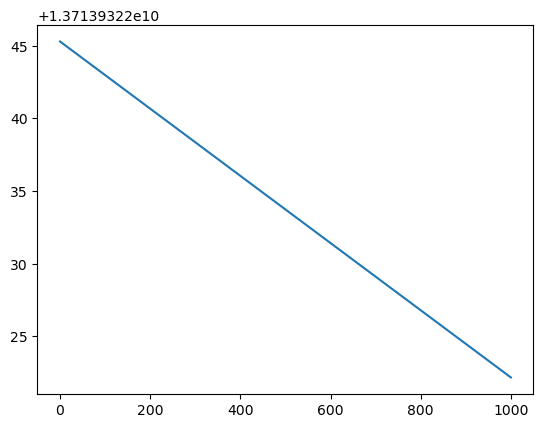

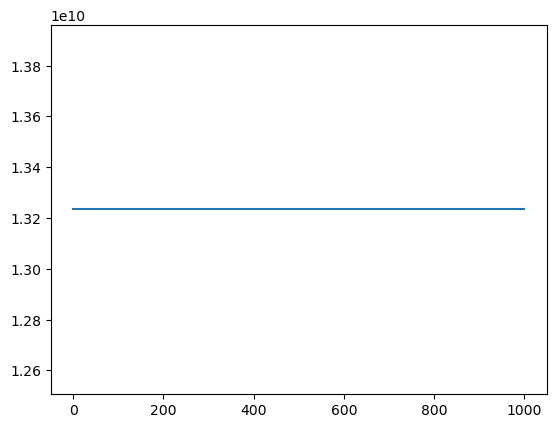

In [28]:
# plotting data 1
#plot
Ridge_reg_meanTest = abs(Ridge_reg.cv_results_['mean_test_score'])
plt.figure()
plt.plot(parameters['alpha'], Ridge_reg_meanTest, label = "Ridge_reg")
plt.show()

Ridge_meanTrain = abs(Ridge_reg.cv_results_['mean_train_score'])

#plotting data 2
plt.figure()
plt.plot(parameters['alpha'], Ridge_meanTrain, label = "LASSO")
plt.show()

### Elastic net

In [29]:
from sklearn.linear_model import ElasticNet

ElasticNet = linear_model.ElasticNet()
# define the grid search
ElasticNet_reg= GridSearchCV(ElasticNet, parameters, scoring='neg_mean_squared_error',cv=5, return_train_score = True)
#fit the grid search
ElasticNet_reg.fit(X,Y)
# best estimator
print(ElasticNet_reg.best_estimator_)

ElasticNet(alpha=1000.0)


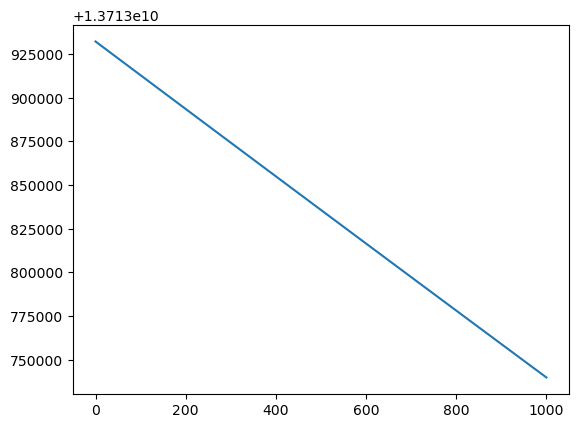

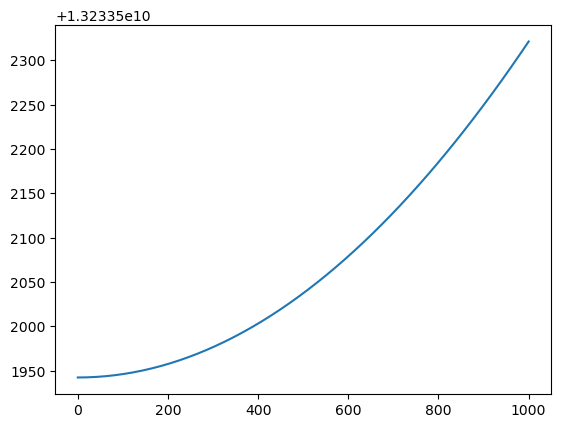

In [30]:
# plotting data 1
#plot
ElasticNet_reg_meanTest = abs(ElasticNet_reg.cv_results_['mean_test_score'])
plt.figure()
plt.plot(parameters['alpha'], ElasticNet_reg_meanTest, label = "ElasticNet_reg")
plt.show()

ElasticNet_meanTrain = abs(ElasticNet_reg.cv_results_['mean_train_score'])

#plotting data 2
plt.figure()
plt.plot(parameters['alpha'], ElasticNet_meanTrain, label = "Elastic")
plt.show()

 b) regularization parameter value vs predictor coefficient values.

## Lasso model

Text(0, 0.5, 'Predictor Coefficient')

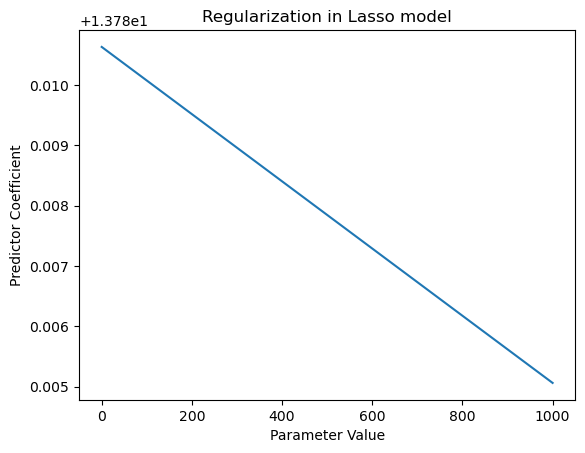

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
Lasso_coef = []
for a in parameters['alpha']:
    Lasso = linear_model.Lasso(alpha = a)
    Lasso.fit(X_train, Y_train)
    Lasso_Y_pred = Lasso.predict(X_test)
    Lasso_coef.append(Lasso.coef_)
plt.plot(parameters['alpha'], Lasso_coef, label = 'LASSO')
plt.title("Regularization in Lasso model")
plt.xlabel("Parameter Value")
plt.ylabel("Predictor Coefficient")

## Ridge Model

Text(0, 0.5, 'Predictor Coefficient')

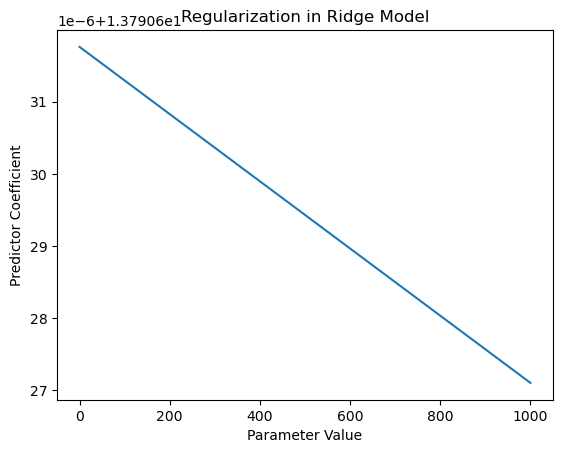

In [32]:
coefs = []
for a in parameters['alpha']:
    Ridge = linear_model.Ridge(alpha = a)
    Ridge.fit(X_train, Y_train)
    Ridge_Y_pred = Ridge.predict(X_test)
    coefs.append(Ridge.coef_)
plt.plot(parameters['alpha'], [item[0] for item in coefs], label = 'Ridge')
plt.title("Regularization in Ridge Model")
plt.xlabel("Parameter Value")
plt.ylabel("Predictor Coefficient")

### Elastic net

Text(0, 0.5, 'Predictor Coefficient')

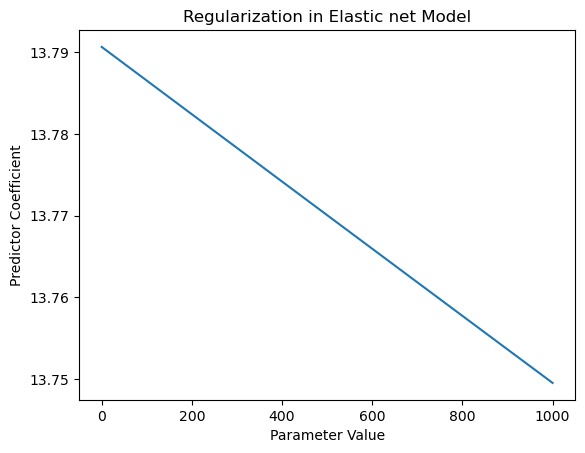

In [33]:
ENet_coef = []
for a in parameters['alpha']:
    ElasticNet = linear_model.ElasticNet(alpha = a)
    ElasticNet.fit(X_train, Y_train)
    ElasticNet_Y_pred = ElasticNet.predict(X_test)
    ENet_coef.append(ElasticNet.coef_)
plt.plot(parameters['alpha'], ENet_coef, label = 'LASSO')
plt.title("Regularization in Elastic net Model")
plt.xlabel("Parameter Value")
plt.ylabel("Predictor Coefficient")

3.  Plot test errors for all three models for the optimal parameters chosen in question 2.  Choose the model that best fits the data. Discuss the results. 

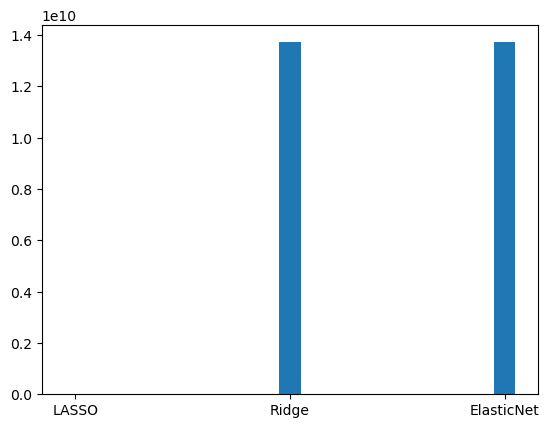

In [34]:
x = ['LASSO', 'Ridge', 'ElasticNet']
y = [abs(Lasso_reg.best_score_), abs(Ridge_reg.best_score_), abs(ElasticNet_reg.best_score_)]
plt.bar(x,y, width = 0.1)
plt.show()


<BarContainer object of 1 artists>

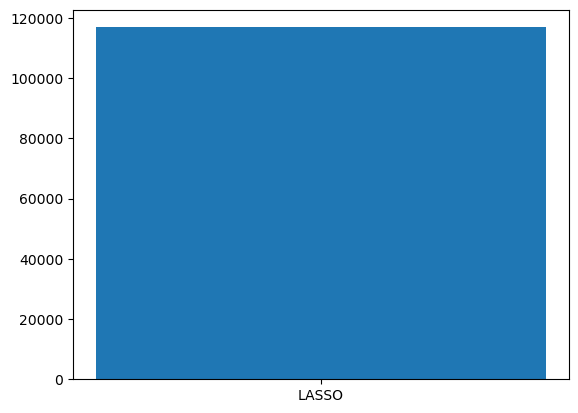

In [35]:
plt.bar('LASSO',abs(Lasso_reg.best_score_), width = 0.1)

In [36]:
display(abs(Lasso_reg.best_score_))
display(abs(Ridge_reg.best_score_))
display(abs(ElasticNet_reg.best_score_))

Base on the bar graph, we see the Lasso model has the lowerst data compare to other two model Ridge and Elastic Net. We can conclude that Lasso is the model has best fit data